### Reading data

In [1]:
import pandas as pd
from sclibrary.network_reader import NetworkReader

data_folder = 'data/sample_data'

#### Option 1: CSV

In [3]:
# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)
simplices

[[0],
 [1],
 [2],
 [3],
 [4],
 [0, 1],
 [0, 2],
 [1, 2],
 [1, 3],
 [1, 4],
 [2, 3],
 [3, 4],
 [1, 2, 3],
 [1, 3, 4]]

In [7]:
# if coordinates exist
coordinates = NetworkReader.get_coordinates(filename=data_folder + '/LondonNodes.csv', node_id_col="Id", x_col='X', y_col='Y')
coordinates

{1: (293.0, 2767.0),
 2: (390.0, 8535.0),
 3: (802.0, 1927.0),
 4: (874.0, 3363.0),
 5: (885.0, 6210.0),
 6: (1020.0, 2288.0),
 7: (1036.0, 1720.0),
 8: (1260.0, 2258.0),
 9: (1314.0, 1542.0),
 10: (1410.0, 2722.0),
 11: (1515.0, 4650.0),
 12: (1582.0, 2190.0),
 13: (1902.0, 3911.0),
 14: (2288.0, 8593.0),
 15: (2580.0, 4035.0),
 16: (2790.0, 2002.0),
 17: (2842.0, 7080.0),
 18: (2902.0, 802.0),
 19: (3127.0, 9308.0),
 20: (3330.0, 2025.0),
 21: (3412.0, 3690.0),
 22: (3705.0, 8077.0),
 23: (3802.0, 600.0),
 24: (4185.0, 2160.0),
 25: (4373.0, 555.0),
 26: (4575.0, 2992.0),
 27: (4747.0, 1890.0),
 28: (4792.0, 2175.0),
 29: (4912.0, 9353.0),
 30: (4920.0, 2962.0),
 31: (4965.0, 7485.0),
 32: (4966.0, 6217.0),
 33: (4995.0, 3472.0),
 34: (4996.0, 4718.0),
 35: (5295.0, 1635.0),
 36: (5377.0, 2662.0),
 37: (5452.0, 1905.0),
 38: (5512.0, 420.0),
 39: (5625.0, 1462.0),
 40: (5970.0, 1327.0),
 41: (6067.0, 9248.0),
 42: (6097.0, 1575.0),
 43: (6307.0, 3052.0),
 44: (6382.0, 97.0),
 45: (65

#### Option 2: TNTP

In [2]:
filename = data_folder + "/network.tntp"
delimeter = "\t"
src_col = "Init node "
dest_col = "Term node "

G = NetworkReader.read_tntp(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col)
simplices = G.simplicies(conditional_triangles=False)
simplices

[[1.0],
 [290.0],
 [307.0],
 [316.0],
 [2.0],
 [302.0],
 [304.0],
 [3.0],
 [301.0],
 [306.0],
 [4.0],
 [5.0],
 [298.0],
 [299.0],
 [310.0],
 [6.0],
 [424.0],
 [425.0],
 [456.0],
 [7.0],
 [274.0],
 [281.0],
 [283.0],
 [8.0],
 [272.0],
 [474.0],
 [480.0],
 [9.0],
 [277.0],
 [10.0],
 [205.0],
 [206.0],
 [214.0],
 [11.0],
 [207.0],
 [12.0],
 [210.0],
 [217.0],
 [222.0],
 [13.0],
 [208.0],
 [211.0],
 [224.0],
 [14.0],
 [244.0],
 [15.0],
 [228.0],
 [533.0],
 [538.0],
 [16.0],
 [601.0],
 [602.0],
 [17.0],
 [597.0],
 [608.0],
 [621.0],
 [18.0],
 [914.0],
 [937.0],
 [938.0],
 [946.0],
 [19.0],
 [617.0],
 [919.0],
 [931.0],
 [20.0],
 [916.0],
 [21.0],
 [915.0],
 [943.0],
 [22.0],
 [831.0],
 [23.0],
 [823.0],
 [835.0],
 [836.0],
 [839.0],
 [24.0],
 [827.0],
 [838.0],
 [855.0],
 [25.0],
 [821.0],
 [841.0],
 [849.0],
 [26.0],
 [322.0],
 [844.0],
 [851.0],
 [27.0],
 [317.0],
 [333.0],
 [824.0],
 [832.0],
 [28.0],
 [328.0],
 [339.0],
 [825.0],
 [29.0],
 [325.0],
 [331.0],
 [30.0],
 [286.0],
 [340.0],

#### Option 3: Incidence matrices, B1 & B2

In [4]:
# read B1, B2
B1_filename = f'{data_folder}/B1.csv'
B2_filename = f'{data_folder}/B2.csv'
G = NetworkReader.read_incidence_matrix(B1_filename, B2_filename)
simplices = G.simplicies
simplices

### Simplical Complex Analysis

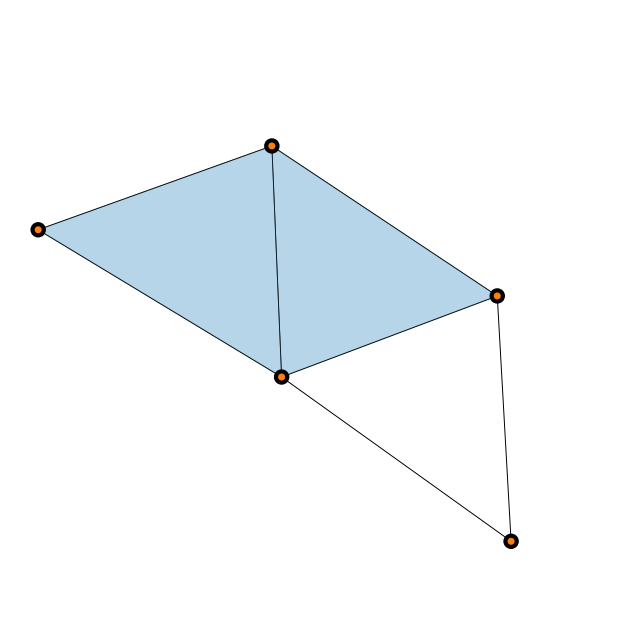

In [5]:
from sclibrary.simplicial_complex import SimplicialComplexNetwork

#sc = SimplicialComplexNetwork(simplices=simplices, pos=coordinates)
sc = SimplicialComplexNetwork(simplices=simplices)
sc.draw_2d(node_radius=0.02)

### Eigendecompostion

In [6]:
k = 1
L1 = sc.hodge_laplacian_matrix(rank=k)
L1U = sc.upper_laplacian_matrix(rank=k)
L1L = sc.lower_laplacian_matrix(rank=k)

In [7]:
import numpy as np
from sclibrary.eigendecomposition import get_harmonic_eigenvectors, get_curl_eigenvectors, get_gradient_eigenvectors

u_h, eigenvecs_h = get_harmonic_eigenvectors(L1)
u_c, eigenvecs_c = get_curl_eigenvectors(L1U)
u_g, eigenvecs_g = get_gradient_eigenvectors(L1L)

In [18]:
L = 10
lam_l = np.diag(L1)
Phi_G = np.array([lam_l ** (l - 1) for l in range(1, L + 1)]).T
Phi_G

array([[1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.2800e+02, 2.5600e+02,
        5.1200e+02],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.2800e+02, 2.5600e+02,
        5.1200e+02],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.2800e+02, 2.5600e+02,
        5.1200e+02],
       ...,
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.2800e+02, 2.5600e+02,
        5.1200e+02],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, ..., 2.1870e+03, 6.5610e+03,
        1.9683e+04],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 1.2800e+02, 2.5600e+02,
        5.1200e+02]], dtype=float32)

### Extra

In [24]:
from scipy.linalg import pinv

# Calculate alpha
alpha = pinv(Phi_G) @ np.concatenate([np.array([1]), np.zeros(len(lam_l)-1)])

# Build the filter
H = np.zeros((7, 7))
for l in range(1, L+1):
    H += alpha[l-1] * L1L**(l-1)
    
H

array([[ 4.99989013e-01,  2.52210576e-02, -8.41018630e-03,
        -8.41018630e-03, -8.41018630e-03,  4.01874218e-04,
         4.01874218e-04],
       [ 2.52210576e-02,  4.99989013e-01,  2.52210576e-02,
         4.01874218e-04,  4.01874218e-04, -8.41018630e-03,
         4.01874218e-04],
       [-8.41018630e-03,  2.52210576e-02,  4.99989013e-01,
         2.52210576e-02,  2.52210576e-02, -8.41018630e-03,
         4.01874218e-04],
       [-8.41018630e-03,  4.01874218e-04,  2.52210576e-02,
         4.99989013e-01,  2.52210576e-02,  2.52210576e-02,
        -8.41018630e-03],
       [-8.41018630e-03,  4.01874218e-04,  2.52210576e-02,
         2.52210576e-02,  4.99989013e-01,  4.01874218e-04,
         2.52210576e-02],
       [ 4.01874218e-04, -8.41018630e-03, -8.41018630e-03,
         2.52210576e-02,  4.01874218e-04,  4.99989013e-01,
        -8.41018630e-03],
       [ 4.01874218e-04,  4.01874218e-04,  4.01874218e-04,
        -8.41018630e-03,  2.52210576e-02, -8.41018630e-03,
         4.9998901

In [137]:
# flow geenration
flow = np.random.rand(L1.shape[0], 1)
print("flow", flow)
# analyze frequency components
flow_h = u_h.T @ flow
flow_g = u_g.T @ flow
flow_c = u_c.T @ flow
print("flow_h", flow_h)
print("flow_g", flow_g)
print("flow_c", flow_c)

flow [[0.31004]
 [0.03894]
 [0.10792]
 [0.1813 ]
 [0.45826]
 [0.18989]
 [0.53967]]
flow_h [[ 0.18668]
 [-0.67182]
 [-0.24841]
 [ 0.21872]
 [-0.21247]
 [-0.18961]
 [ 0.05168]]
flow_g [[ 0.18668]
 [-0.67182]
 [-0.24841]
 [ 0.21872]
 [ 0.21247]
 [ 0.16781]
 [-0.18515]]
flow_c [[ 0.1434 ]
 [-0.18961]
 [-0.05168]
 [-0.40154]
 [ 0.37462]
 [ 0.31004]
 [ 0.03894]]
